In [15]:
# -*- coding: utf-8 -*-
import pandas as pd
from time import time
import seaborn as sns


import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [16]:
gg = pd.read_excel('Google & Yelp Reviews.xlsx',sheetname=0)
df = gg[~gg['Review'].isnull()]
df.shape

(1551, 4)

In [17]:
yy = pd.read_excel('Google & Yelp Reviews.xlsx',sheetname=1)
df2 = yy[~yy['Review'].isnull()]
df2.shape

(372, 4)

In [18]:
df = df.append(df2)
df.shape

(1923, 4)

In [19]:
df = df[(df['Rating']>3)]
df.shape

(1645, 4)

In [20]:
import nltk
# nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
import string

from nltk.corpus import stopwords 
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()



In [21]:
stop = pd.read_fwf('stop.txt',names=['words'])
stopwords.update(set(stop['words'].values))
# print (list(stopwords)[:10])
stopwords.update(set(['dont','lot','wa','im','ha','doe','wa', 'able',]))

In [22]:
def cleaning(article):
    article = str(article)
    zero = "".join(i for i in article if i not in punctuation)
    
    one = " ".join([i for i in zero.lower().split() if i not in stopwords])
    
    three = " ".join(lemmatize.lemmatize(i) for i in one.split())
    return three

In [23]:
from collections import defaultdict
freq = defaultdict(int)

for i in stopwords:
    freq[i]+=1

In [24]:
print type(freq)
freq['it']

1

### all

In [25]:
# all_content = df['content'].append(holdout['content'])

In [26]:
all_content=df['Review']
apple = all_content

### choices

In [27]:
# nltk.download('wordnet')
start = time()

ap_text = apple.apply(cleaning)
ap_text_list = [i.split() for i in ap_text]
print (len(ap_text_list))

print ('used: {:.2f}s'.format(time()-start))

In [31]:
ap_text[:10]

2     edward schiller service tech complete highly r...
3     product service impressed job foundation compa...
6                                  awesome company deal
7            prompt efficient glad chose company thanks
8                                              time job
11    jeremy kevin extremely nice informative extrem...
13                 service tech professional inspection
14                       solve quickly price affordable
16                            time service thorough job
17    experience standard heating air conditioning a...
Name: Review, dtype: object

In [32]:
from gensim.models.phrases import Phraser, Phrases

start = time()
phs = Phrases(ap_text_list)
('used: {:.2f}s'.format(time()-start))

'used: 0.06s'

In [33]:
bi_gram = Phraser(phs)
start = time()

new_bi_list = [bi_gram[i] for i in ap_text_list]

('used: {:.2f}s'.format(time()-start))

'used: 0.17s'

In [34]:
bi_gram[ap_text_list[0]]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

In [35]:
new_bi_list[0]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

In [36]:
start = time()

phs3=Phrases(new_bi_list)
tri_gram=Phraser(phs3)

('used: {:.2f}s'.format(time()-start))


'used: 0.40s'

In [37]:
start = time()

new_tri_list = [tri_gram[i] for i in new_bi_list]

('used: {:.2f}s'.format(time()-start))


'used: 0.15s'

In [38]:
# new_tri_list = new_bi_list

In [39]:
print new_tri_list

In [40]:
make_dic = dict()
for i,j in zip(range(len(new_tri_list)), new_tri_list):
    make_dic[i]=j

In [41]:
without_stop = pd.Series(make_dic)

In [64]:
pd.options.display.max_colwidth=135

In [66]:
pd.DataFrame(without_stop, columns=['pre-processed reviews'])

pre-processed reviews
0                                                                               [edward, schiller, service_tech, complete, highly_recommend]
1     [product, service, impressed, job, foundation, company, tell, prevent, sinking, pier, called, strive, jeremy, raise, concrete_drive...
2                                                                                                                   [awesome, company, deal]
3                                                                                          [prompt, efficient, glad, chose, company, thanks]
4                                                                                                                                [time, job]
5     [jeremy_kevin, extremely, nice, informative, extremely, excellent_job, excellent_job, final, concrete, patching, look, nice, recomm...
6                                                                                                   [service_tech, professional, inspection]
7                                                                                                        [solve, quickly, price, affordable]
8                                                                                                             [time, service, thorough, job]
9     [experience, standard_heating, air_conditioning, ac, friday, standard, called, monday, called, 9, ac, job, standard, larger, scope,...
10                                                [michael, ran, crew, ran, obstacle, kept_informed, talk, option, care, overall_experience]
11                                                                                                                      [hour, calling, job]
12                                                                        [competent, efficient, technician, impressed, recommend, standard]
13    [past, month, trying, morris, jenkins, service, air_conditioning, excuse, called, gsm_service, immediately, hour, nishan, fixed, ac...
14                                                                                      [jeremy_kevin, malik, professional, hard, job, time]
15    [uneven, temperature, house, furnace, ac, running, mark, assessed, situation, attic, insulation, terribly, insufficient, original, ...
16    [quick, professional, knowledgeable, happy, wrong, didnt, blow, smoke, try, sell, didnt, 15, hvac, replace, compressor, breaking, b...
17    [scott_wilson, afs, developed, proposal, alleviate, moisture, water, crawlspace, realized, afs, appeared, solution, industry, syste...
18    [steven, grant, install, hvac, equipment, duct, design, hvac, system, additional, insulation, happier, result, process, highly_reco...
19                                                                                                                    [service, day, called]
20                                                       [excellent_service, guy, ontime, fast, courteous, professional, highly_recommended]
21                                                                                             [scott, straightened, unit, decided, service]
22    [jeremy_kevin, house, install, wall_anchor, super, friendly, time, finished, ahead, schedule, look, question, basement, happy, answ...
23                                                             [gsm, replaced, aging, hvac, system, efficient, system, wonderfully, pleased]
24                                                                                                                            [jeremy_kevin]
25    [pipework, schedule, quickly, clean, tricky, roof, drain, glad, plumbing, contractor, clean, roof, drain, pleased, completed, techn...
26    [job, exceeded_expectation, guy, gary, cox, foreman, jonathan, bush, co, foreman, james, brown, installer, professional, knowledgea...
27                                                                        [courteous, thorough, wonderful, accurate, complete, service, adk]
28                            

In [67]:
without_stop.head(10)

0                                                                              [edward, schiller, service_tech, complete, highly_recommend]
1    [product, service, impressed, job, foundation, company, tell, prevent, sinking, pier, called, strive, jeremy, raise, concrete_drive...
2                                                                                                                  [awesome, company, deal]
3                                                                                         [prompt, efficient, glad, chose, company, thanks]
4                                                                                                                               [time, job]
5    [jeremy_kevin, extremely, nice, informative, extremely, excellent_job, excellent_job, final, concrete, patching, look, nice, recomm...
6                                                                                                  [service_tech, professional, inspection]
7                   

In [43]:
len(without_stop[0])

5

In [44]:
def helper_len(x):
    leng=[0]
    for i in x:
        leng.append(len(i))
    return max(leng)

In [45]:
with_stop = without_stop.apply(helper_len)

import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
with_stop.value_counts().head(10)

16    214
12    203
13    167
17    140
20    125
15    118
10     99
11     93
18     86
9      61
dtype: int64

<Container object of 27 artists>

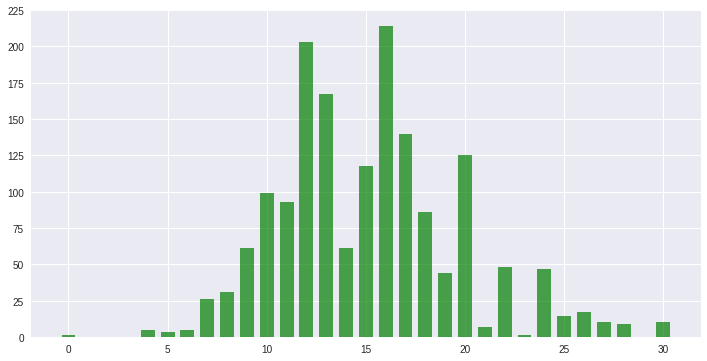

In [47]:
graph = with_stop.value_counts()

plt.figure(figsize=(12,6))
plt.bar(graph.index, graph.values, .7, color='g', alpha=.7)

In [30]:
without_stop[:10]

NameError: name 'without_stop' is not defined

In [29]:
without_stop

NameError: name 'without_stop' is not defined

In [31]:
ap_text_list = list(without_stop.values)

In [32]:
len(ap_text_list)

1645

In [33]:
ap_text_list[0]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

## topic models

In [34]:
# ! pip install gensim pyLDAvis WordCloud

### change name

In [35]:
# Importing Gensim
import gensim
from gensim import corpora

from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='re_g.log',filemode='w')

In [36]:

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(ap_text_list)
dictionary.save('re_g.dict')
(dictionary)

In [37]:
# gensim.models.ldamodel.LdaModel?

In [38]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in ap_text_list]
corpora.MmCorpus.serialize('re_g.mm', doc_term_matrix)

(len(doc_term_matrix))
(doc_term_matrix[100])

[(22, 1),
 (29, 1),
 (59, 1),
 (64, 1),
 (69, 2),
 (74, 1),
 (115, 1),
 (164, 1),
 (194, 1),
 (366, 1),
 (421, 1),
 (810, 1),
 (885, 1),
 (886, 1),
 (887, 1),
 (888, 1),
 (889, 1),
 (890, 1),
 (891, 1),
 (892, 1)]

In [39]:
# Lda?

In [40]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
#                passes=5
              )
'used: {:.2f}s'.format(time()-start)

'used: 6.93s'

In [41]:
ldamodel.print_topics()

[(0,
  u'0.025*"job" + 0.013*"basement" + 0.008*"time" + 0.007*"guy" + 0.007*"professional" + 0.007*"crew" + 0.007*"project" + 0.007*"company" + 0.005*"service" + 0.005*"day"'),
 (1,
  u'0.018*"crew" + 0.017*"job" + 0.014*"basement" + 0.013*"company" + 0.012*"professional" + 0.009*"home" + 0.007*"house" + 0.007*"thank" + 0.007*"system" + 0.006*"time"'),
 (2,
  u'0.019*"professional" + 0.016*"job" + 0.014*"crew" + 0.014*"basement" + 0.013*"company" + 0.011*"time" + 0.010*"service" + 0.008*"home" + 0.007*"system" + 0.007*"house"'),
 (3,
  u'0.015*"basement" + 0.011*"professional" + 0.011*"home" + 0.011*"job" + 0.010*"crew" + 0.009*"time" + 0.008*"service" + 0.008*"system" + 0.007*"water" + 0.006*"team"'),
 (4,
  u'0.017*"job" + 0.015*"crew" + 0.011*"system" + 0.011*"time" + 0.009*"basement" + 0.008*"thanks" + 0.007*"professional" + 0.007*"day" + 0.007*"company" + 0.006*"service"')]

In [42]:
# !pip install pyLDAvis

In [43]:
ldamodel.save('re_g.model')

## load saved model

In [44]:
from gensim.models import LdaModel
loading = LdaModel.load('re_g.model')

## plotting



In [45]:
import pyLDAvis.gensim
import gensim
from time import time
pyLDAvis.enable_notebook()

In [46]:
d = gensim.corpora.Dictionary.load('re_g.dict')
c = gensim.corpora.MmCorpus('re_g.mm')
lda = gensim.models.LdaModel.load('re_g.model')

In [47]:
start = time()

data = pyLDAvis.gensim.prepare(lda, c, d)

print ('used: {:.2f}s'.format(time()-start))

In [48]:
pyLDAvis.save_html(data,'re_g.html')


In [49]:
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      34.572066        1       1 -0.033505 -0.000930
1      21.695910        1       2 -0.018804 -0.007896
4      16.220530        1       3 -0.016079  0.041622
3      13.841894        1       4  0.005306 -0.044281
0      13.669599        1       5  0.063083  0.011486, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
5599  Default  617.000000               job  617.000000  30.0000  30.0000
4735  Default  112.000000             water  112.000000  29.0000  29.0000
146   Default  103.000000           project  103.000000  28.0000  28.0000
2329  Default  480.000000          basement  480.000000  27.0000  27.0000
1688  Default  121.000000            thanks  121.000000  26.0000  26.0000
1598  Default   39.000000                de   39.000000  25.0000  25.0000
1778  Default  129.000000               guy  129.000000  24.0000  24.0000
4031  Default   29.000000                le   29.000000  23.0000  23.0000
1206  Default  271.000000            system  271.000000  22.0000  22.0000
2971  Default  500.000000              crew  500.000000  21.0000  21.0000
2786  Default  287.000000              home  287.000000  20.0000  20.0000
1889  Default   30.000000                et   30.000000  19.0000  19.0000
338   Default  330.000000              time  330.000000  18.0000  18.0000
2313  Default  124.000000             clean  124.000000  17.0000  17.0000
2243  Default  128.000000             issue  128.000000  16.0000  16.0000
364   Default  144.000000              team  144.000000  15.0000  15.0000
3255  Default   69.000000          thrasher   69.000000  14.0000  14.0000
2702  Default  146.000000             thank  146.000000  13.0000  13.0000
5225  Default   74.000000           cleaned   74.000000  12.0000  12.0000
2035  Default  116.000000     knowledgeable  116.000000  11.0000  11.0000
3761  Default   98.000000         extremely   98.000000  10.0000  10.0000
4047  Default  208.000000               day  208.000000   9.0000   9.0000
99    Default   56.000000  customer_service   56.000000   8.0000   8.0000
2494  Default   33.000000              ryan   33.000000   7.0000   7.0000
5392  Default  103.000000            called  103.000000   6.0000   6.0000
4012  Default   45.000000               afs   45.000000   5.0000   5.0000
4787  Default   95.000000       crawl_space   95.000000   4.0000   4.0000
5620  Default   52.000000              mike   52.000000   3.0000   3.0000
4495  Default   75.000000          thorough   75.000000   2.0000   2.0000
3     Default   12.000000             ����t����   12.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
1778   Topic5   36.881747               guy  129.005795   0.7379  -4.9120
3950   Topic5    6.288633           putting   13.766901   1.2065  -6.6810
3307   Topic5    6.274166              nous   14.026814   1.1855  -6.6833
2329   Topic5   65.915077          basement  480.518630   0.0035  -4.3314
2237   Topic5   13.800011            beyond   47.120172   0.7620  -5.8950
99     Topic5   14.434247  customer_service   56.280616   0.6292  -5.8501
2919   Topic5   24.912641         recommend  154.511642   0.1651  -5.3043
338    Topic5   38.916698              time  330.930961  -0.1505  -4.8583
4735   Topic5   20.191024             water  112.539808   0.2719  -5.5145
2656   Topic5   12.243459          employee   50.320494   0.5766  -6.0147
4787   Topic5   17.475750       crawl_space   95.762252   0.2889  -5.6589
4047   Topic5   26.573203               day  208.129298  -0.0683  -5.2398
1500   Topic5   16.658813         sump_pump   93.331322   0.2668  -5.7068
756    Topic5   33.145517           company  358.067543  -0.3898  -5.0188
5631   Topic5   17.679376         completed  109.045912   0.1706  -5.6473
3695   Topic5   25.1932

## wordcloud

In [50]:
# ap_text_list